<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/201028_14%EC%9E%A5_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np

# 군집분석

# 1.군집분석 기초

## 1.1 군집분석의 종류
- 군집분석
  - __집단 또는 범주에 대한 사전 정보가 없는 데이터__를, 주어진 관측 값을 사용하여  
  전체를 몇 개의 __유사한 집단으로 그룹화__하여 각 집단의 성격을 파악하기 위한 통계분석 기법
  - __유사성이 높은 대상들을 묶어 전체를 세분화__하여, 데이터의 전체 구조와 특성 파악 가능
  - 군집분석 결과를 바탕으로 추가적인 통계분석기법 접목가능  
  ex) 추후 해당 군집으로 편입될 고객들 예측

  
- __군집분석의 종류__
  - __계층적 군집분석__
    + 모든 개체들에 대해 __순차적(계층적)으로 군집을 형성__시켜 나아가는 군집분석 방법
    + __나무모양의 계층구조__이므로 군집 형성과정을 파악할 수 있음
    + 군집화 과정에서 가장 적절한 군집단계 지정
    + 장단점
           장점 1. 자료의 구조적 특성에 따라 적합한 군집 수 결정 가능
                2. 군집이 형성되어 가는 과정을 비교적 명확하개 파악 가능
           단점
                1. 분석 자료의 크기가 클수록, 연산 오래 소모
                2. 적절한 군집단계 파악 어려움
  - __비계층적 군집분석__
    + 계층적 군집분석 이외의 모든 군집분석 방법
    + 가장 많이 사용되는 방법 = __K-평균 군집분석__, 코호넨 네트워크 분석
    + __군집의 수를 미리 지정__ > 해당 영역의 세분화에 대한 이해와 경험이 필요
    + 지정한 군집 수에 따라 각 군집들의 특성이 달라질 수 있음
    + 대용량 데이터에 적용 가능

## 1.2.군집분석의 과정
- __군집분석 방법결정 > 분석변수 지정 > 이상치 제거 > 유사성 측정 > 군집화 > 군집특성 파악__
- __군집분석 방법결정__
                  - 군집분석의 목적과 데이터 특성에 따라 지정  
                  - 계층적 군집분석: 탐색 목적 강하거나 분류 개체 규모 크지 않을 때
                  - 비계층적 군집분석: 내부적으로 확정된 군집 수에 의해 대규모 분류 시
- __분석변수 지정__
                  - 군집화하기 위한 유사성(거리)측정 시, 사용될 분석변수 지정
                  - 이 분석변수에 따라 군집의 품질 결정됨
                  - 수치형 척도로 측정된 변수들이 바람직
- __이상치제거__
                  - 개체들의 분포를 파악하여 극단 값을 갖는 이상치 분석에서 제외
                  - 군집 속성 값을 왜곡시키고 유사성 계산시 잘못된 거리 값을 파생시킬 가능성 있기 때문
-  __유사성 측정__
                  - 가장 적합한 유사성 측정방식을 채택하여 군집간의 유사성 평가(거리 계산)
                  - 유클리디안 거리, 맨하탄 거리, 피어슨 거리, 민코프스키 거리, 마할라노비스 거리 측정 방식 등
- __군집화__
                  - 간집간의 거리를 바탕으로 유사한 개체를 묶어 동질적인 집단으로 형성
                  - 계층적 군집분석: 최단 연결법, 최장 연결법, 평균 연결법, Ward 방법 등
                  - 비계층적 군집분석: 순차적 군집화, 동시 군집화, 최적할당 군집화 등
- __군집의 특성 파악__
                  - 군집들에 대한 특성 파악 후 특성에 적합한 군집명 지정
                  - 분석변수 외에도 다른 외생변수들의 관점에서 군집들간의 특성 비교 가능

## 1.3. 유사성 측정 방법
- 관측치들간의 거리가 가까울수록 유사성이 큼
- ① __유클리디안 거리__
    - 일반적인 이차원 상의 거리척도
    - 군집분석에서 가장 자주 사용되는 거리 측정 방식
    - 유클리디안 거리 =각 측정변수들의 차이를 제곱한 값들을 모두 합한 후 재곱급을 취한 값
    - 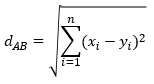
   - 유클리디안 제곱거리 = 유클리디안 거리를 다시 제곱한 값. 비교적 단순한 계산. Ward 방식 군집 분석 시 사용
- ② __맨하탄 거리__
    - 두 지점의 최단거리인 유클리디안 거리가 현실적인 거리척도로 수용되기 어려울 때 한 지점에서 다른 지점으로 이동할 시 몇 개의 블록을 이동해야 하는지 계산
    - 도시 블록 거리라고도 함
    - 측정변수 편차의 절대값을 합한 값
    - 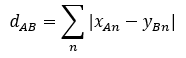
- ③ __피어슨 거리__
    - 측정변수들의 피어슨 상관계수를 활용하여 두 개체간의 거리를 계산
    - 1에서 두 개체들간의 상관계수를 뺀 값
    - 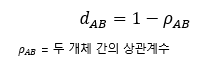
- ④ __민코프스키 거리__
    - 유클리디안 거리와 맨하탄 거리를 일반화한 거리측정 모형
    - 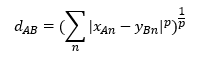
    - 위의 식에서 p = 1일 때 맨하탄거리, p = 2일 때 유클리디안 거리
- ⑤ __마할라노비스 거리__
    - 유클리디안 거리 측정시, 측정변슈들의 척도가 이질적이거나, 동일한 척도라도 변수마다 값의 차이가 클 경우 측정된 거리에 오류 포함 가능성 큼
    - 이를 우이해 변수들의 단위를 표준화하고, 변수들 간의 상호연광선을 고려한 방식
    - 만약, 모든 측정변수들이 표준화되어 있고, 서로 독립일 경우 유클리디안 거리 = 마할라노비스 거리
    - image.png

## 1.4.군집분석과 요인분석의 비교
- 공통점: __데이터의 구조를 분류 및 요약한다는 점__
- 요인분석
  + R-타입 요인분석: 요인추출의 대상이 변수
  + Q-타입 요인분석: 요인추출의 대상이 응답자 or 사례. 군집 분석과 동일.
- 차이점
  + __Q-타입 요인분석은 응답자들의 평균 및 표준편차간의 상관관계에 기초__하여 통계적인 방법으로 그룹화
  + __군집분석은 개체간의 거리 정보를 계산하는 수리적인 방법__으로 그룹화
- 보통, 변수가 아닌 응답자들을 그룹화할 경우 계산상 어려움이 있는 Q-타입 요인분석 보다는 군집분석을 이용

# 2.계층적 군집분석

## 2.1.개념 및 주요 이론
- __군집방향__
  - 병합방법(bottom-up): 전체 개체 수 N개로부터 시작하여 최종적으로 하나의 군집이 남을 때까지 순차적으로 유사한 개체들을 병합
  - 분할방법(top-down): 모든 개체들을 포함하는 하나의 군집에서 시작하여, 최종적으로 전체 개수인 N개의 군집으로 분할될 때 까지 순차적으로 상이한 개체들 분한
  - 일반적으로 병합방법을 기본으로 채택
- __병합방식의 계층적 군집화 방법__
  - 최단연결법: 각 군집의 임의의 두 개체들 간의 거리 중 최단거리를 두 군집간의 거리로 정의
  - 최장연결법: 각 군집의 임의의 두 개체들 간의 거리 중 최정거리를 두 군집간의 거리로 정의
  - 평균연결법: 각 군집의 모든 개체들의 평균거리를 두 군집간의 거리로 정의
  - 중심연결법: 각 군집의 모든 개체들의 중심위치에 있는 개체 간의 거리를 두 군집간의 거리로 정의
  - 중위수 연결법: 각 군집의 임의의 두 개체들의 거리 평균을 합하여 2로 나눈 값(중위수)에 해당하는 거리를 두 군집간의 거리로 정의
  - __Ward의 방법__: 각 군집에 속한 __개체가 해당 군집의 평균과의 거리 편차를 제곱한 값인 잔차 제곱합의 증가를  
  최소화할 수 있는 지점간의 거리__를 두 군잡간의 거리로 정의. 계층적 군집분석에서 가장 많이 적용됨
- __군집 수 결정 방법__
  - 덴드로그램 활용
  - 덴드로그램: 군집화 일정표의 결과를 시각적으로 옮긴 군집 현황 도표. 군집화를 통해 형성된 그룹과 이들의 유사성을 표시한 트리 다이어그램.
  - 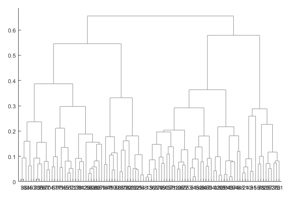
  - 가지의 길이(거리)는 군집이 얼마나 서로 멀리 떨어져 있는지 보여줌
  - 가지의 길이를 바탕으로 적절한 군집의 개수 정할 수 있음
  - 위의 예시를 보았을 때, 2개의 군집으로 나눌 때 가지의 길이가 가장 길게 나타나므로 최적의 군집 수는 2개

## 2.2.분석 및 해석
- 쇼핑몰은 RFM 기반 고객세분화를 수행하고자 함
- 500명의 고객을 무작위로 샘플링하여 Recency, Frequecny, Monetary 세 가지 변수를 통한 계층적 군집분석 진행

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [6]:
from scipy.cluster.hierarchy import linkage
data_temp = df.sample(n=500, random_state=111)
X = data_temp[['Recency','Frequency','Monetary']]
X.head()

,Recency,Frequency,Monetary
190,6,1,1
104,7,6,7
295,5,3,4
12,7,3,4
87,7,3,5


- scipy패키지의 cluster.herarchy 서브 모듈로 계층적 군십분석 수행
- cluster.hierarchy는 계층적 군집분석에 필요한 다양한 군집화 방법, 덴드로그램 제공


In [9]:
# 계층적 군집분석
cluster = linkage(X, method = 'average', metric = 'euclidean')
cluster[490:]

array([[969.        , 979.        ,   2.43557142,  72.        ],
       [978.        , 988.        ,   2.60070576,  33.        ],
       [984.        , 991.        ,   2.78913055,  40.        ],
       [981.        , 989.        ,   3.05800305, 374.        ],
       [986.        , 990.        ,   3.11871825,  81.        ],
       [161.        , 993.        ,   3.55293738, 375.        ],
       [994.        , 995.        ,   3.67802103, 456.        ],
       [987.        , 992.        ,   3.97824721,  44.        ],
       [996.        , 997.        ,   6.01862823, 500.        ]])

- linkage(data, method = '군집화방법', metric = '유사성 측정 방법')
- method: ward, single, average, complete,centroid, median 중 하나
- metric: euclidean, cityblock 등 중 하나


- 1~2열: 병합되는 군집번호
- 3열: 군집 간 거리
- 4열: 군집에 속한 개체 수
- 마지막 두 개를 보면, __군집간 거리가 3.978에서 6.01으로 66% 증가__하였기 때문에, 2개의 군집으로 나누는 것이 적절

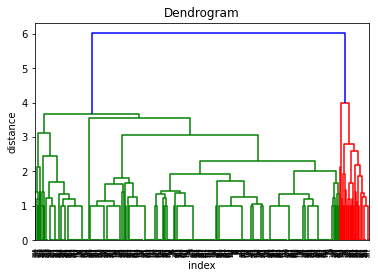

In [10]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster)
plt.show()

- 가지의 길이(거리)가 2개 or 3개 군집을 선택 가능
- 가지의 길이만 보면 2개로 결정하는 것이 올바르나, 해당문제의 경우 RFM을 중심으로 고객세분화를 하는 것이 목적이므로 3개의 그룹으로 관리하는 게 올바름

# 3.비계층적 군집분석

# 3.1.개념 및 주요 이론
- __군집화 방법__
  - __순차적 군집화__: 군집의 중심이 정해짐 > 지정된 값의 거리 안에 있는 개체들 군집으로 분류 > 새로운 군집의 중심 정해짐. K-평균 군집분석 방법.
  - __동시 군집화__: 사전에 지정된 일정 값 안에 해당하는 개체들을 소속시킴. 몇 개의 군집을 동시에 결정
  - __최적할당 군집화__: 군집 내의 평균거리를 계산하는 최적화 기준 도출. 이에 따라 최초의 군집에서 다른 군집으로 재할당 될 수 있음
- __K-평균 군집분석__
  - 주어진 분류 대상 개체를 K개의 군집으로 형성해나가는 비계층적 군집분석 방법
  - __각 군집과 개체간의 거리 편차의 분산을 최소화__하는 방향
  - 군집화 __속도가 빨라 대용량 데이터에 적합__
  - 그러나, __군집의 개수(K)를 명확히 지정__해야하며, 최초 설정된 초기값(seed)에 따라서 군집분석의 결과가 상이하게 나타날 수 있음
- __K-평균 군집분석 알고리즘__
          1. 군집의 수 즉, K를 지정 (예: K = 4)
          2. 전체 개체 중에서 K개 만큼의 초기 씨앗개체(seed)를 임의로 지정
          3. K개의 씨앗개체와 나머지 모든 개체와의 거리를 계산한 후, 각 개체들은 가장 가까운 씨앗개체와 동일한 군집으로 초기 군집으로 할당
          4. 각 초기 군집에서 군집의 중심개체로 해당 군집의 시앗개체를 변경
          5. 군집의 중심 즉, 씨앗개체의 변화가 없을 때까지 상디 3,4의 과정 반복
  - 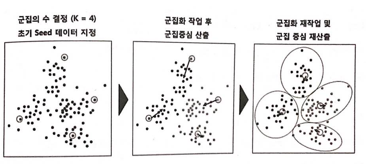

## 3.2.분석 및 해석
- RFM 기반의 고객세분화를 K-평균 군집분석으로 수행

In [11]:
from sklearn.cluster import KMeans
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head() 

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [12]:
X = df[['Recency','Frequency','Monetary']]
X.head()

,Recency,Frequency,Monetary
0,7,3,4
1,2,3,3
2,7,3,2
3,7,3,5
4,7,6,7


In [13]:
# 비계층적 군집분석
model = KMeans(n_clusters=3, max_iter=20, random_state =19).fit(X)
X['cluster_id'] = model.labels_
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Recency,Frequency,Monetary,cluster_id
0,7,3,4,0
1,2,3,3,2
2,7,3,2,0
3,7,3,5,1
4,7,6,7,1


- KMeans(n_cluster=군집수, max_iter=최대반복횟수)
- labels_ 속성을 이용해 군집번호로 라벨링

In [17]:
# 군집별 고객 수 확인
clu1 = X[X.cluster_id == 0]
clu2 = X[X.cluster_id == 1]
clu3 = X[X.cluster_id == 2]
print('군집 1의 고객 수:', clu1.cluster_id.count())
print('군집 2의 고객 수:', clu2.cluster_id.count())
print('군집 3의 고객 수:', clu3.cluster_id.count())

군집 1의 고객 수: 512
군집 2의 고객 수: 411
군집 3의 고객 수: 77


In [18]:
# 군집별 평균 RFM 확인
print('군집 1의 RFM 평균:', clu1.Recency.mean(), clu1.Frequency.mean(), clu1.Monetary.mean())
print('군집 2의 RFM 평균:', clu2.Recency.mean(), clu2.Frequency.mean(), clu2.Monetary.mean())
print('군집 3의 RFM 평균:', clu3.Recency.mean(), clu3.Frequency.mean(), clu3.Monetary.mean())

군집 1의 RFM 평균: 6.8359375 3.212890625 2.892578125
군집 2의 RFM 평균: 6.9391727493917275 4.600973236009732 5.768856447688565
군집 3의 RFM 평균: 1.7792207792207793 3.207792207792208 3.7532467532467533


- 계층적 군집분석과는 다르게, 군집의 수를 미리 지정해주었기 때문에 3개의 군집으로 추출
- 군집 규모: 군집1 > 군집2 > 군집3
- 군집 별 3가지 변수의 평균을 보았을 때, 군집2 = 우량고객 그룹
- Frequency, Monetary를 보았을 때, 군집1과 군집3이 유사한 그룹으로 보이지만, Recency 값이 매우 큰 차이를 보이므로, 군집3은 최근에 구매이력이 없는 잠재 이탈고객 그룹으로 보임
